In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as mn

from matplotlib import pyplot as plt

In [5]:
tb_data = pd.read_csv('../data/../data/train.csv', index_col='id')
tb_data

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,target
id,,,,,,,,,,,,,,,,,,,,,
0,0.106643,3.594370,132.8040,3.184280,0.081971,1.18859,3.732380,2.266270,2.099590,0.012330,...,1.098620,0.013331,-0.011715,0.052759,0.065400,4.211250,1.978770,0.085974,0.240496,0
1,0.125021,1.673360,76.5336,3.378250,0.099400,5.09366,1.275620,-0.471318,4.545940,0.037706,...,3.460170,0.017054,0.124863,0.154064,0.606848,-0.267928,2.577860,-0.020877,0.024719,0
2,0.036330,1.497470,233.5460,2.194350,0.026914,3.12694,5.056870,3.849460,1.801870,0.056995,...,4.883000,0.085222,0.032396,0.116092,-0.001688,-0.520069,2.141120,0.124464,0.148209,0
3,-0.014077,0.246000,779.9670,1.890640,0.006948,1.53112,2.698000,4.517330,4.503320,0.123494,...,3.474390,-0.017103,-0.008100,0.062013,0.041193,0.511657,1.968600,0.040017,0.044873,0
4,-0.003259,3.715420,156.1280,2.147720,0.018284,2.09859,4.154920,-0.038236,3.371450,0.034166,...,1.910590,-0.042943,0.105616,0.125072,0.037509,1.043790,1.074810,-0.012819,0.072798,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,0.043008,1.640550,1375.8900,1.087030,0.839580,1.69362,3.843520,1.108250,1.505390,-0.022177,...,1.552280,0.080317,0.017643,0.225133,0.073179,4.436510,1.739330,0.049038,0.065804,1
599996,0.137048,4.826860,-99.6478,0.985289,0.037712,3.30370,2.471790,5.942130,0.875148,-0.009738,...,1.345210,0.092457,0.081926,0.234041,0.041383,3.873990,1.870100,0.162313,0.085662,0
599997,1.316220,0.502062,66.2360,2.233020,0.060038,3.77371,2.655340,3.155890,1.055020,0.025137,...,2.181150,0.032708,0.109668,0.027466,0.061931,-0.383329,0.922113,0.084864,0.052635,0


In [7]:
# check data types
tb_data.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

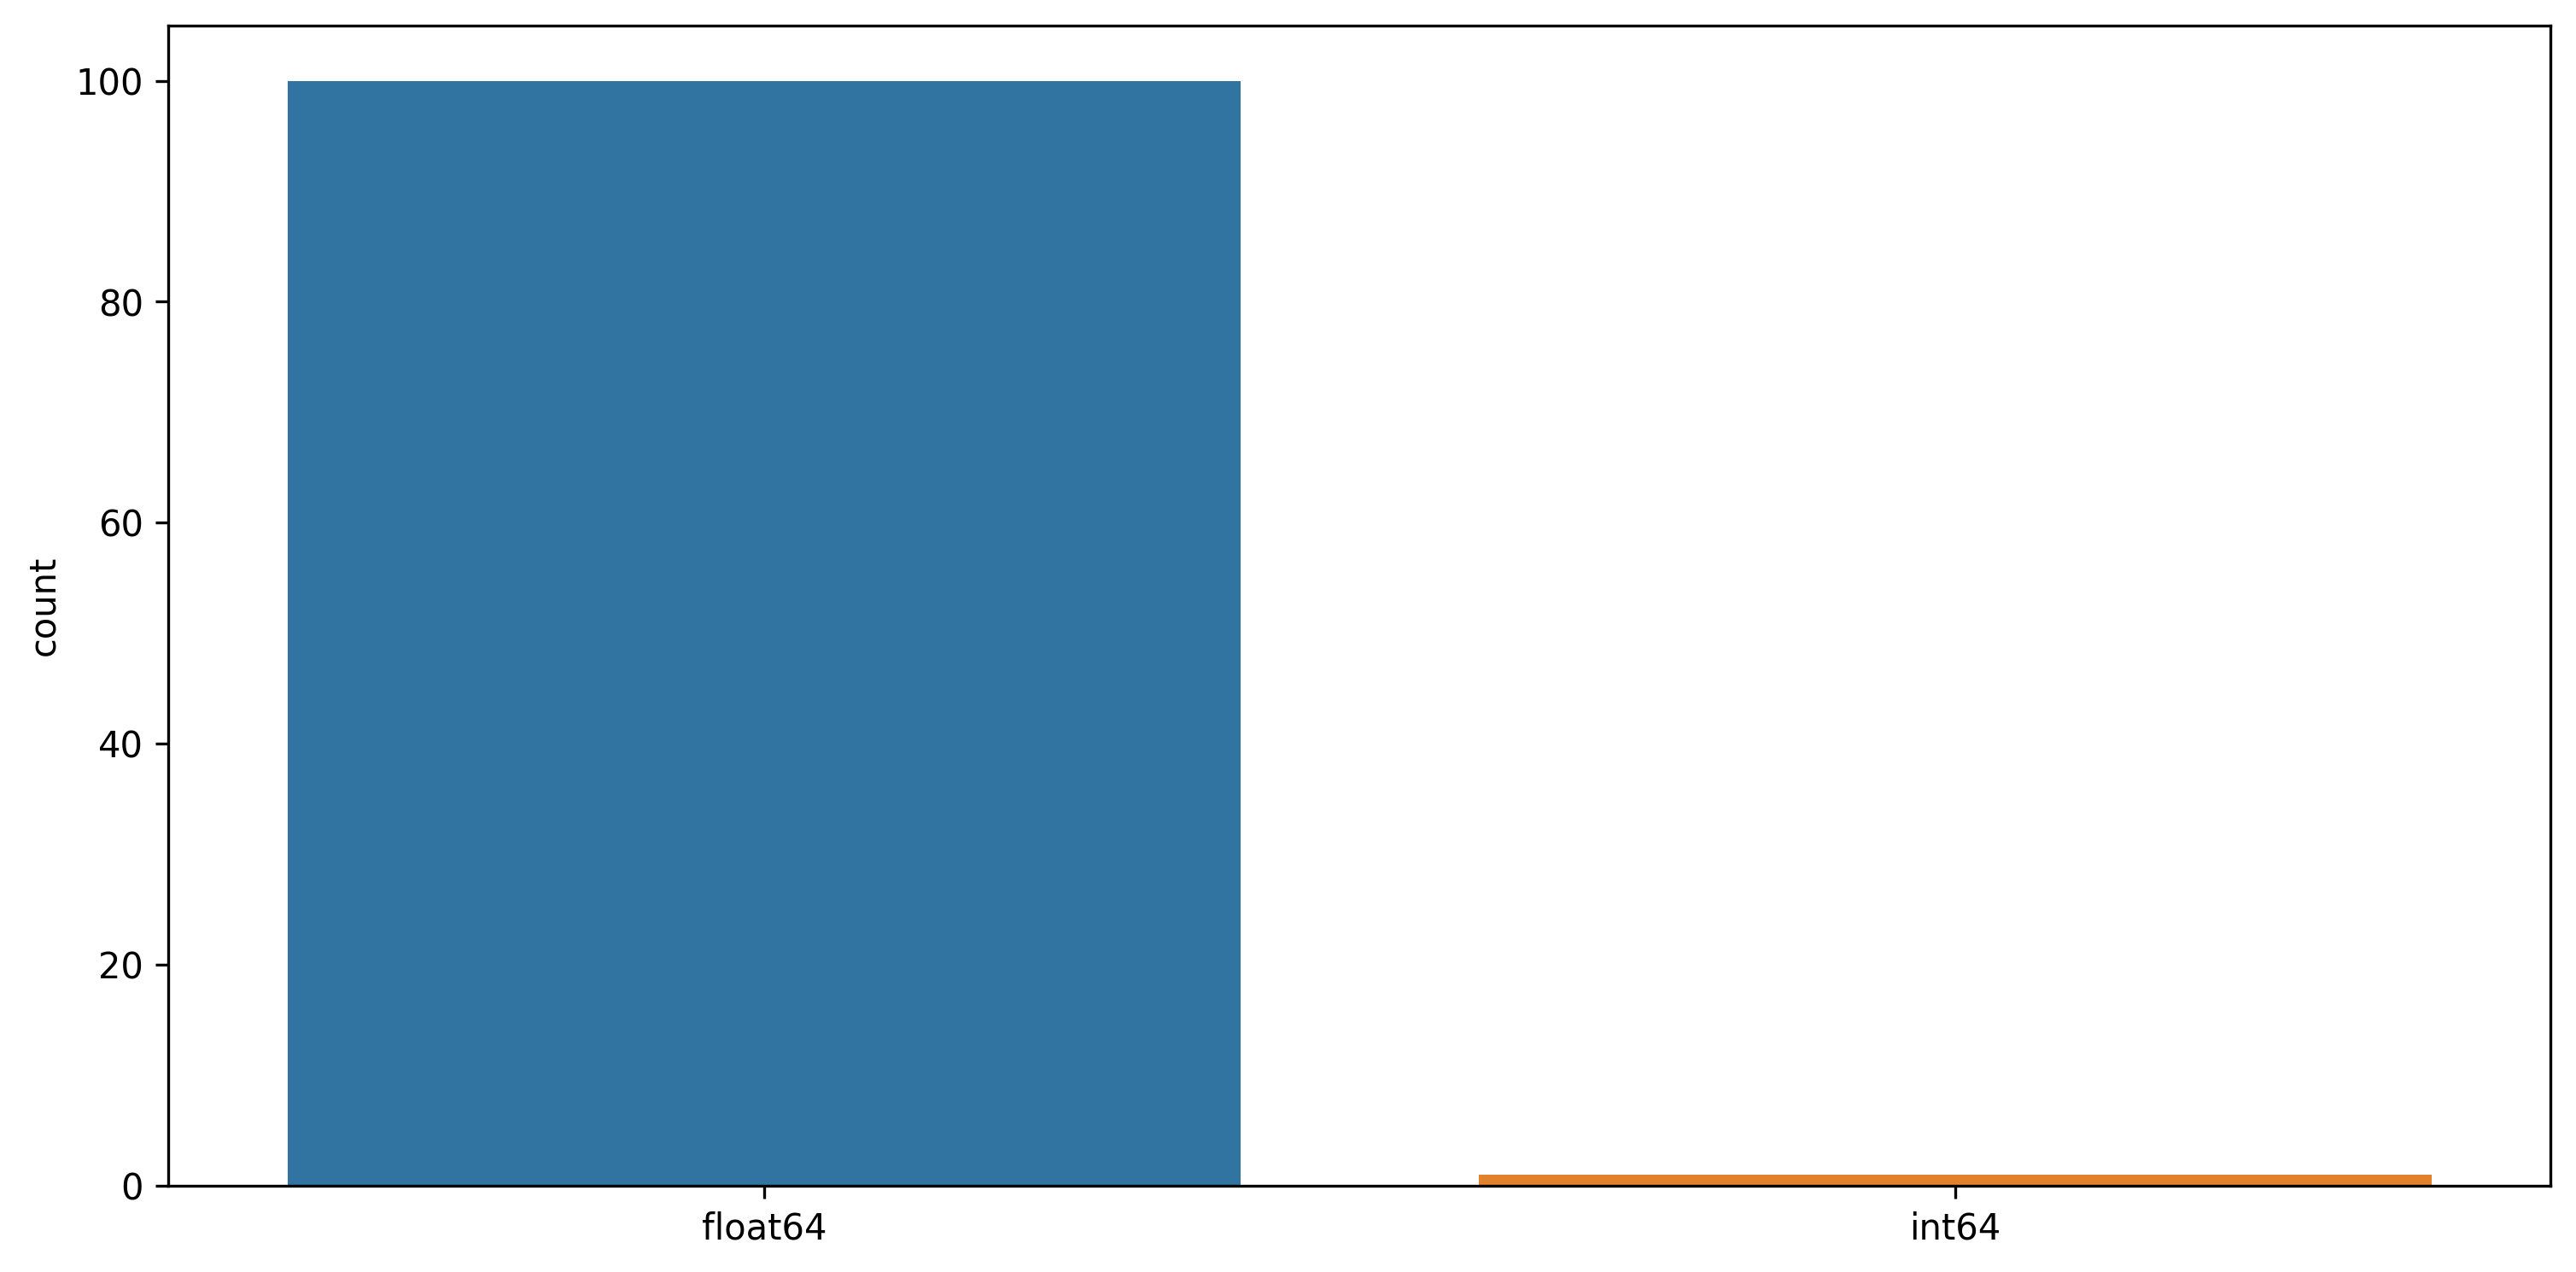

In [8]:
plt.figure(figsize=[12, 6], dpi=300)
sns.countplot(x=tb_data.dtypes)
plt.show()

In [10]:
tb_data.dtypes.value_counts()

float64    100
int64        1
dtype: int64

<Figure size 3600x1800 with 0 Axes>

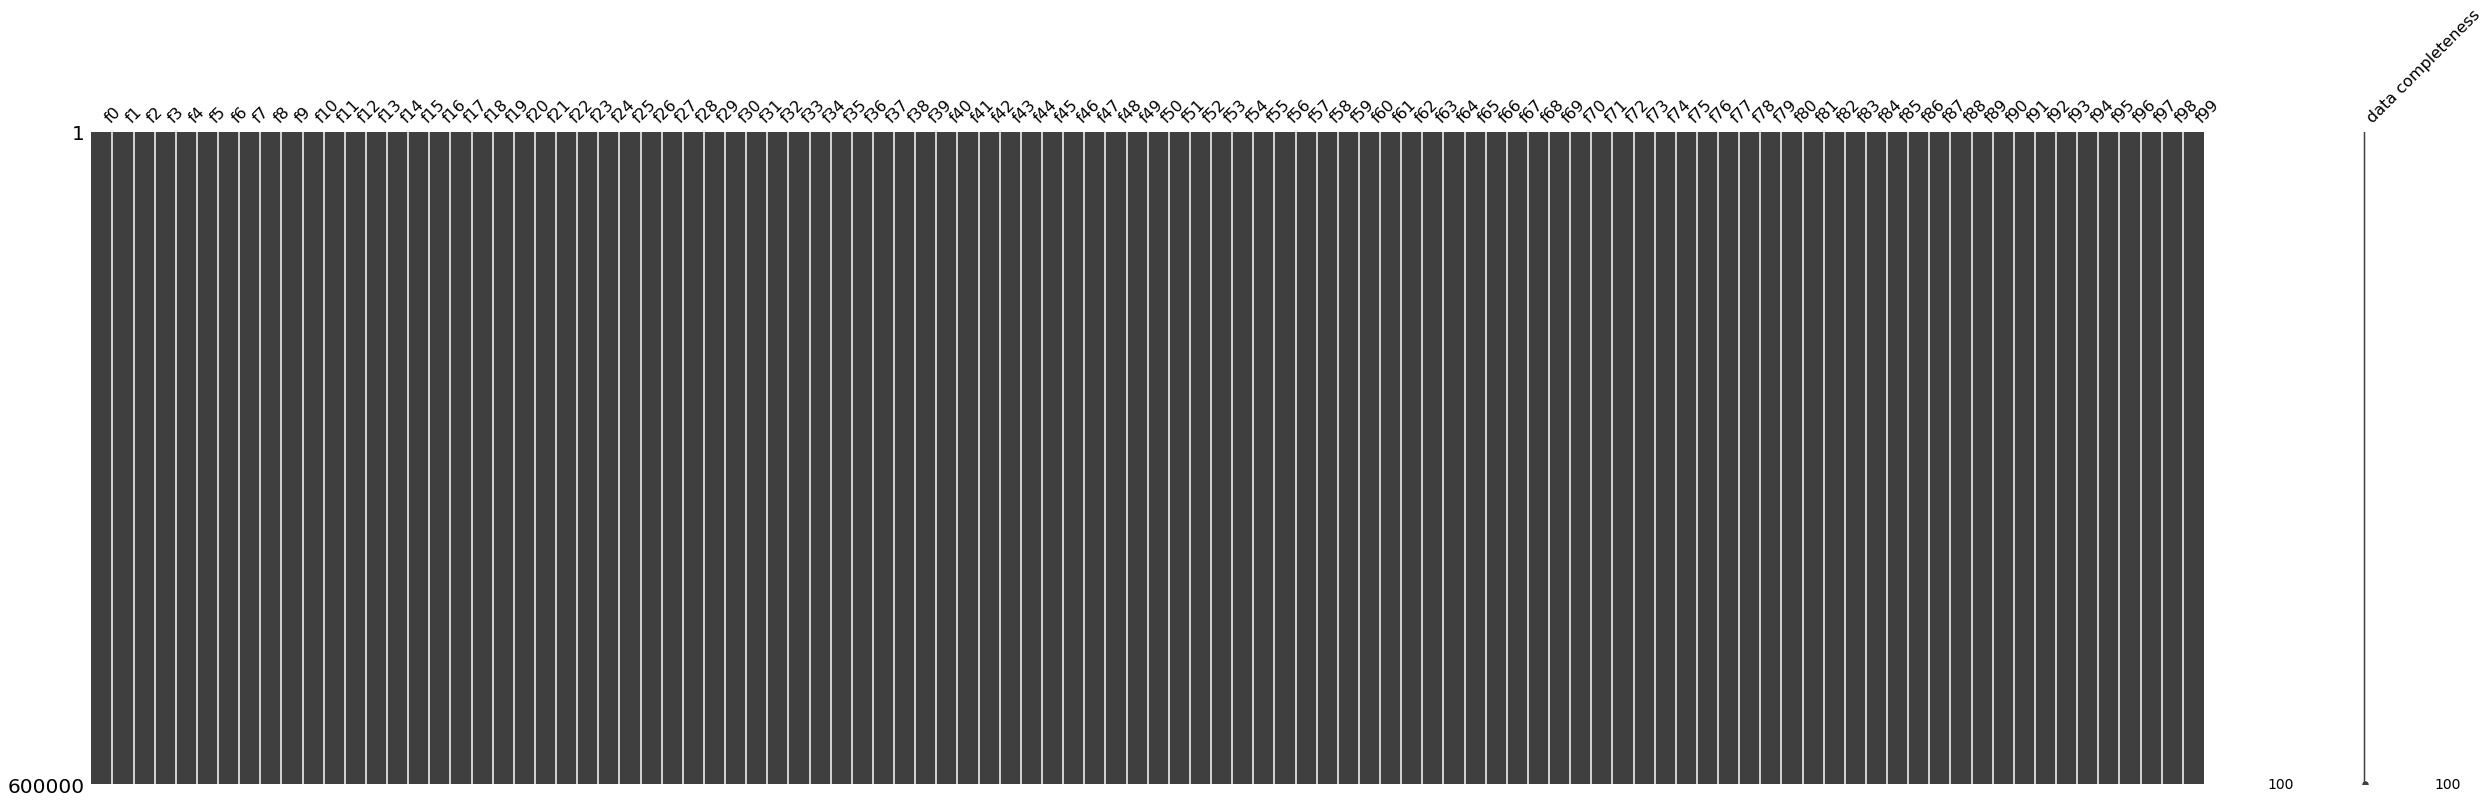

In [16]:
# check for missing values
plt.figure(figsize=[12, 6], dpi=300)
mn.matrix(df=tb_data.loc[:, :'f99'],
          figsize=[42, 12],
          labels=tb_data.columns.to_list())
plt.show()

In [17]:
tb_data.isna().sum().sort_values(ascending=False)

f0        0
f64       0
f74       0
f73       0
f72       0
         ..
f31       0
f30       0
f29       0
f28       0
target    0
Length: 101, dtype: int64

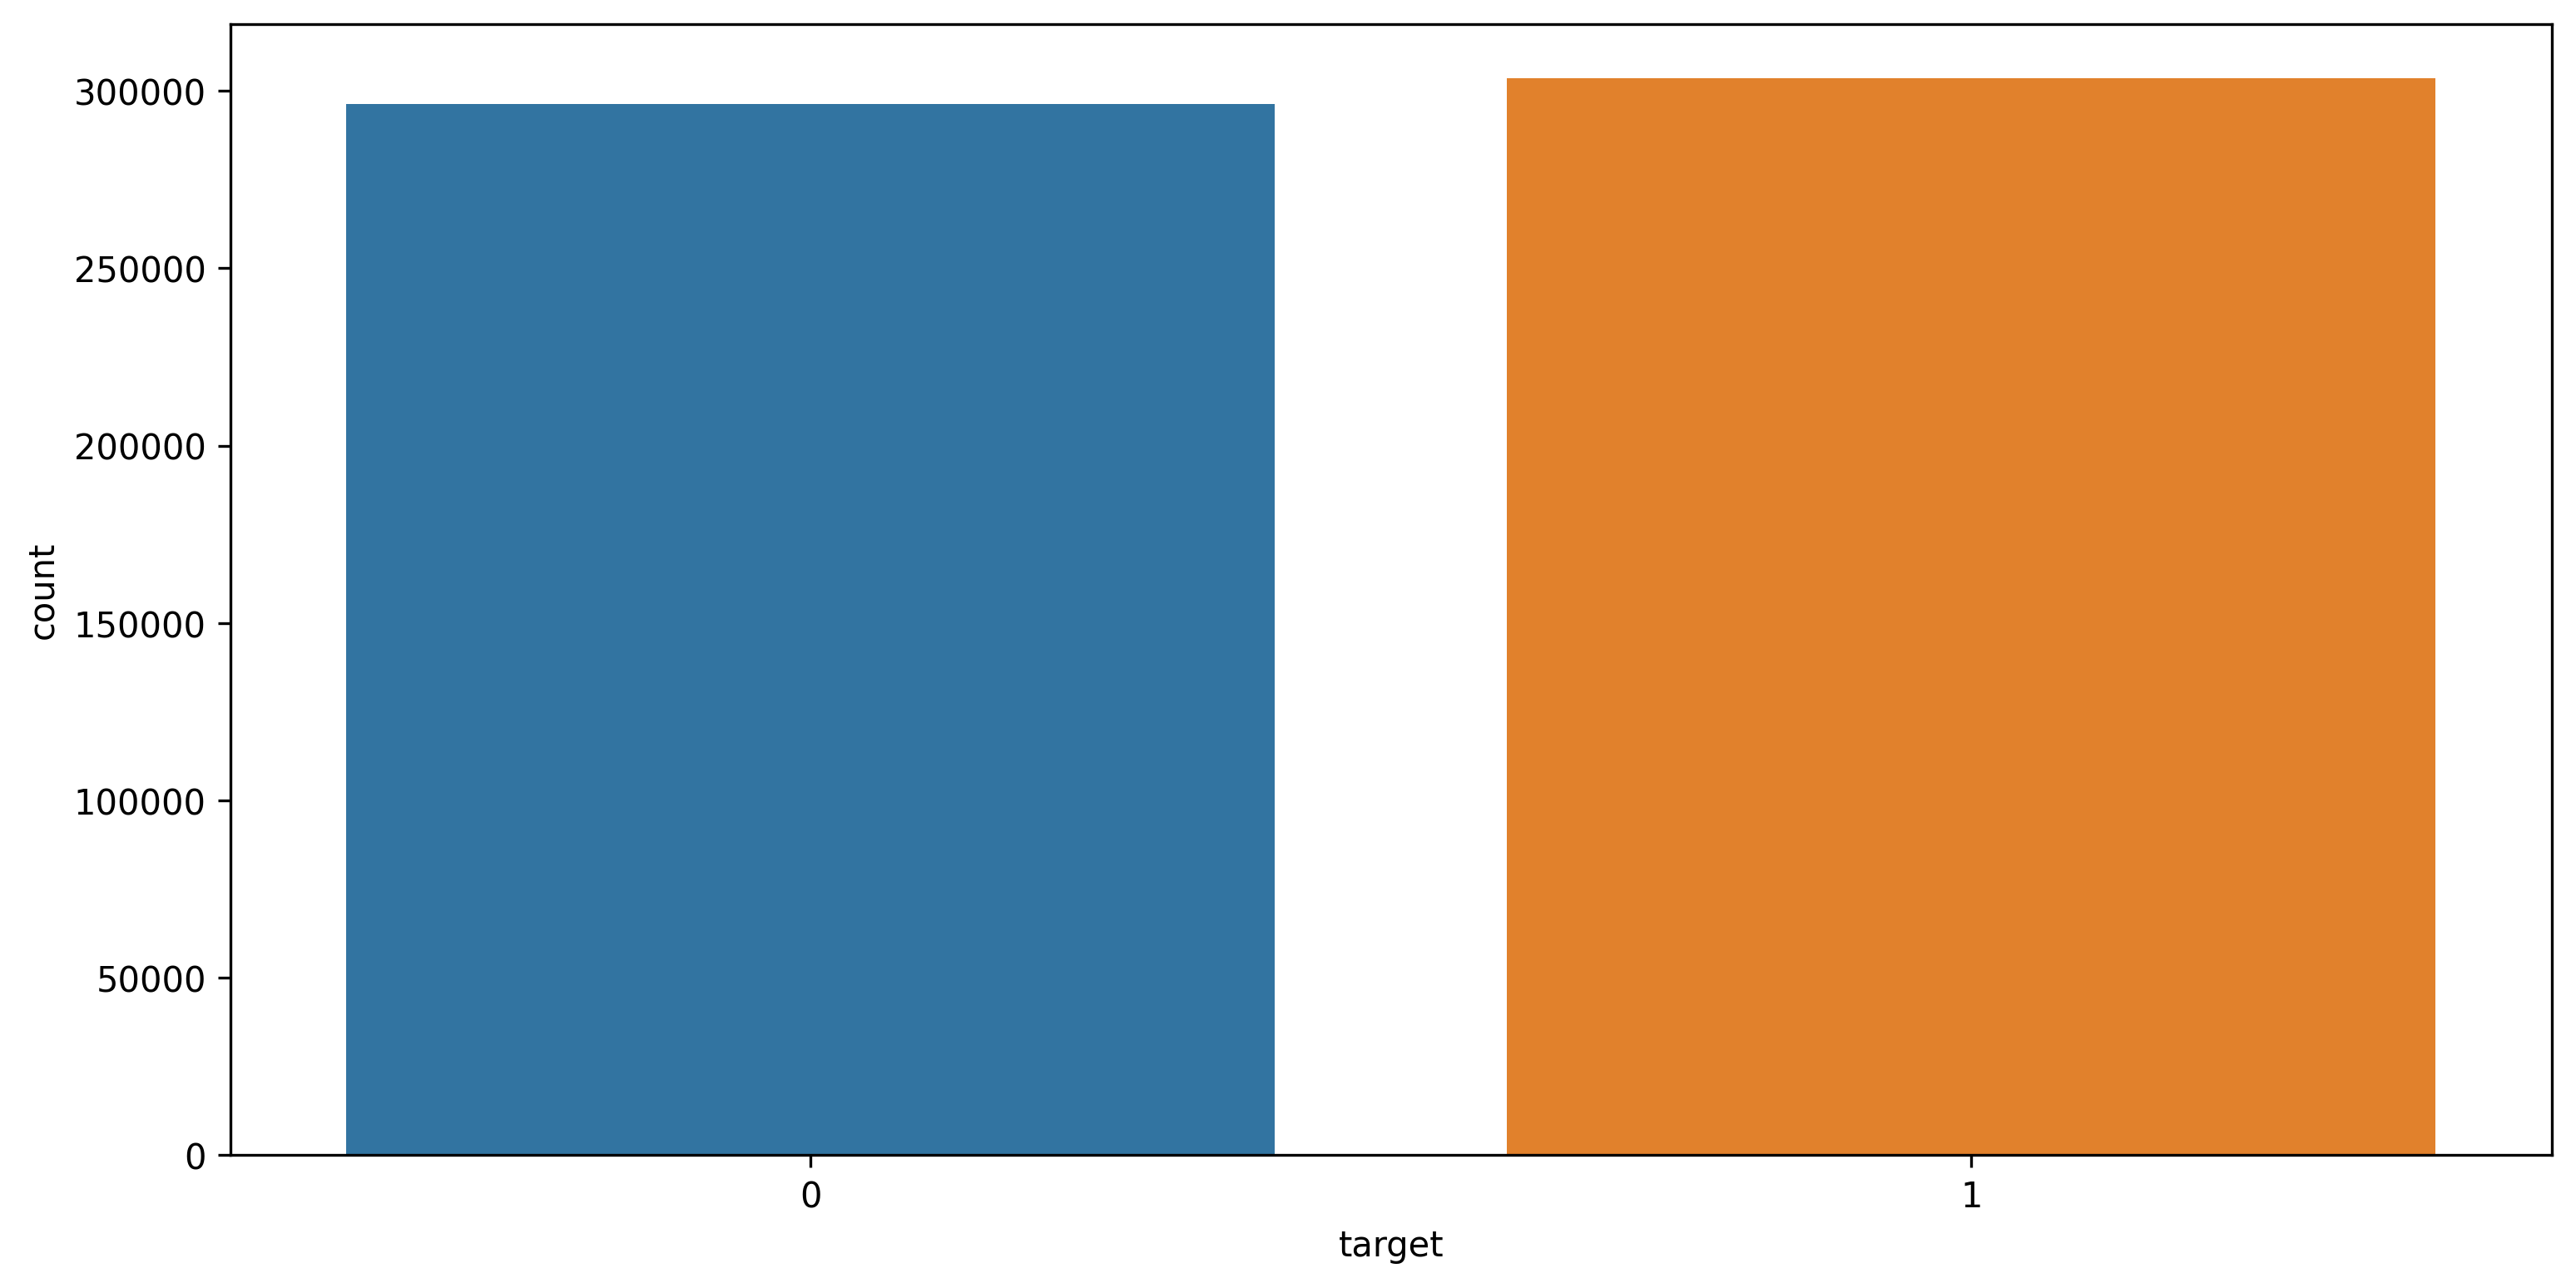

In [18]:
# check class balance
plt.figure(figsize=[12, 6], dpi=300)
sns.countplot(x='target', data=tb_data)
plt.show()

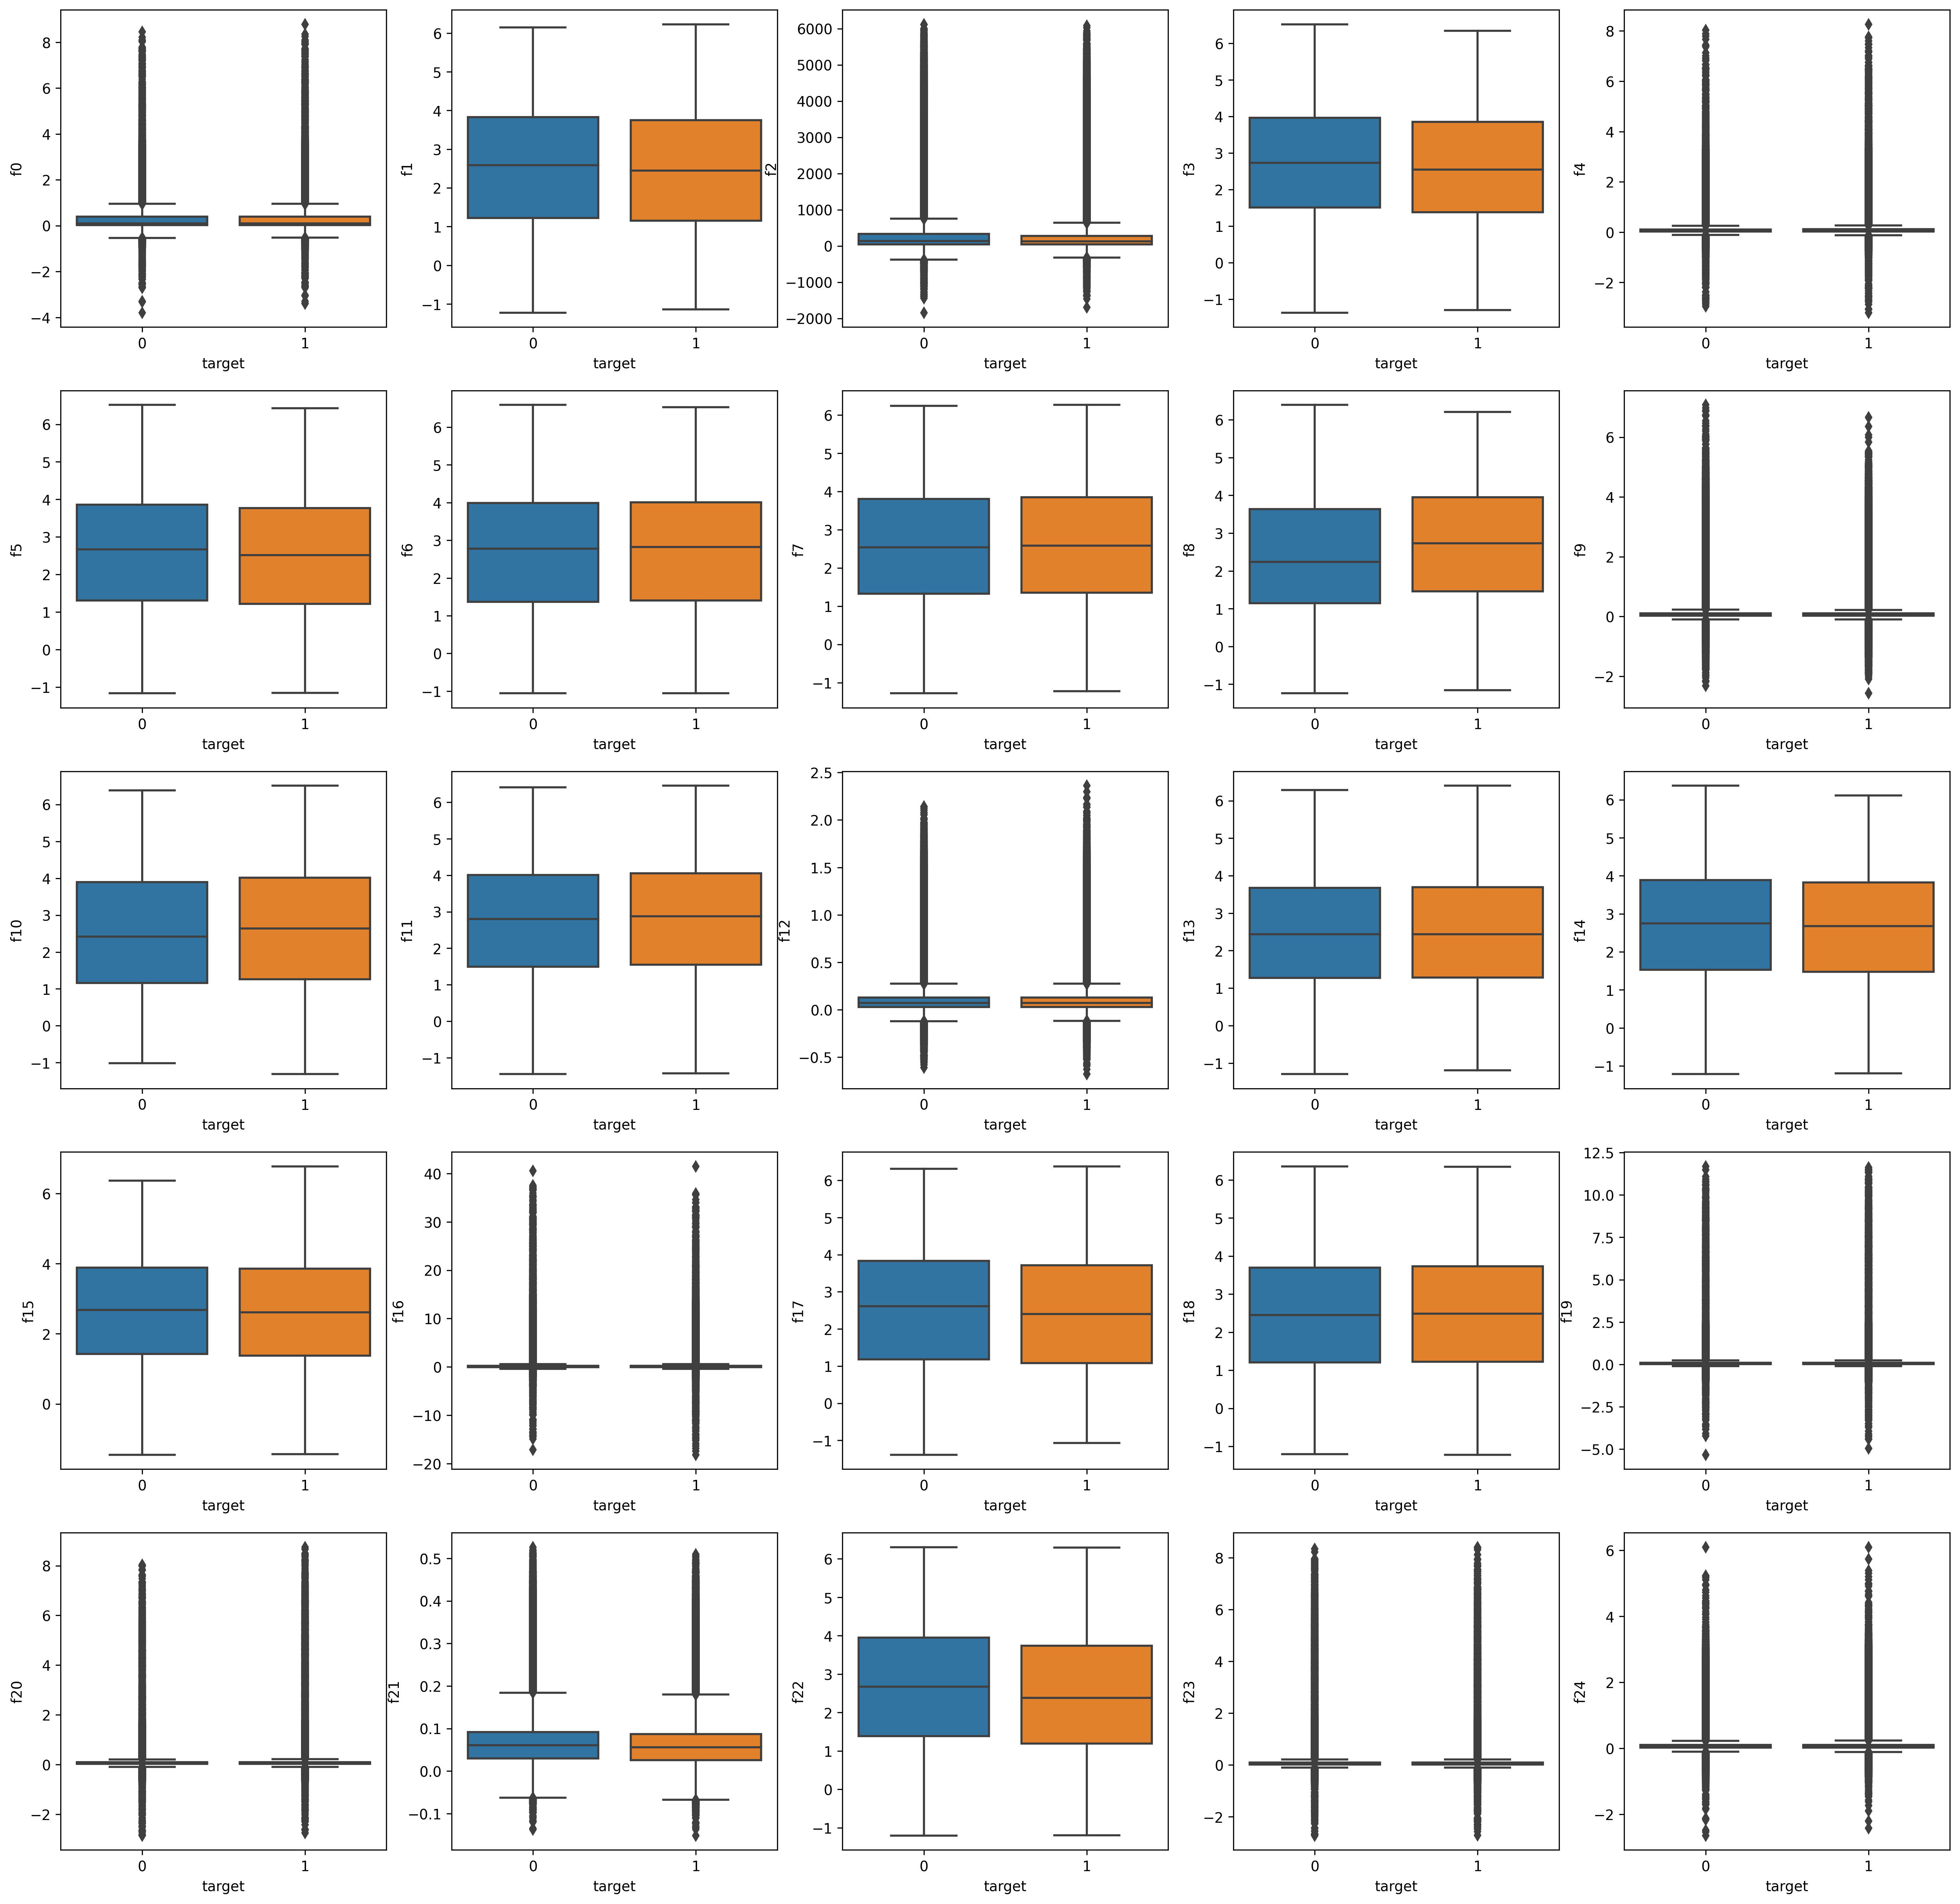

In [25]:
# check for outliers

# f0 - f24
col_1 = tb_data.columns[:25]
figure_1, axes_1 = plt.subplots(nrows=5, ncols=5, figsize=[24, 24], dpi=300)
axes_1 = axes_1.ravel()

for i in range(len(axes_1)):
    sns.boxplot(x=tb_data['target'], y=tb_data[col_1[i]],
                ax=axes_1[i], orient='v')

plt.show()

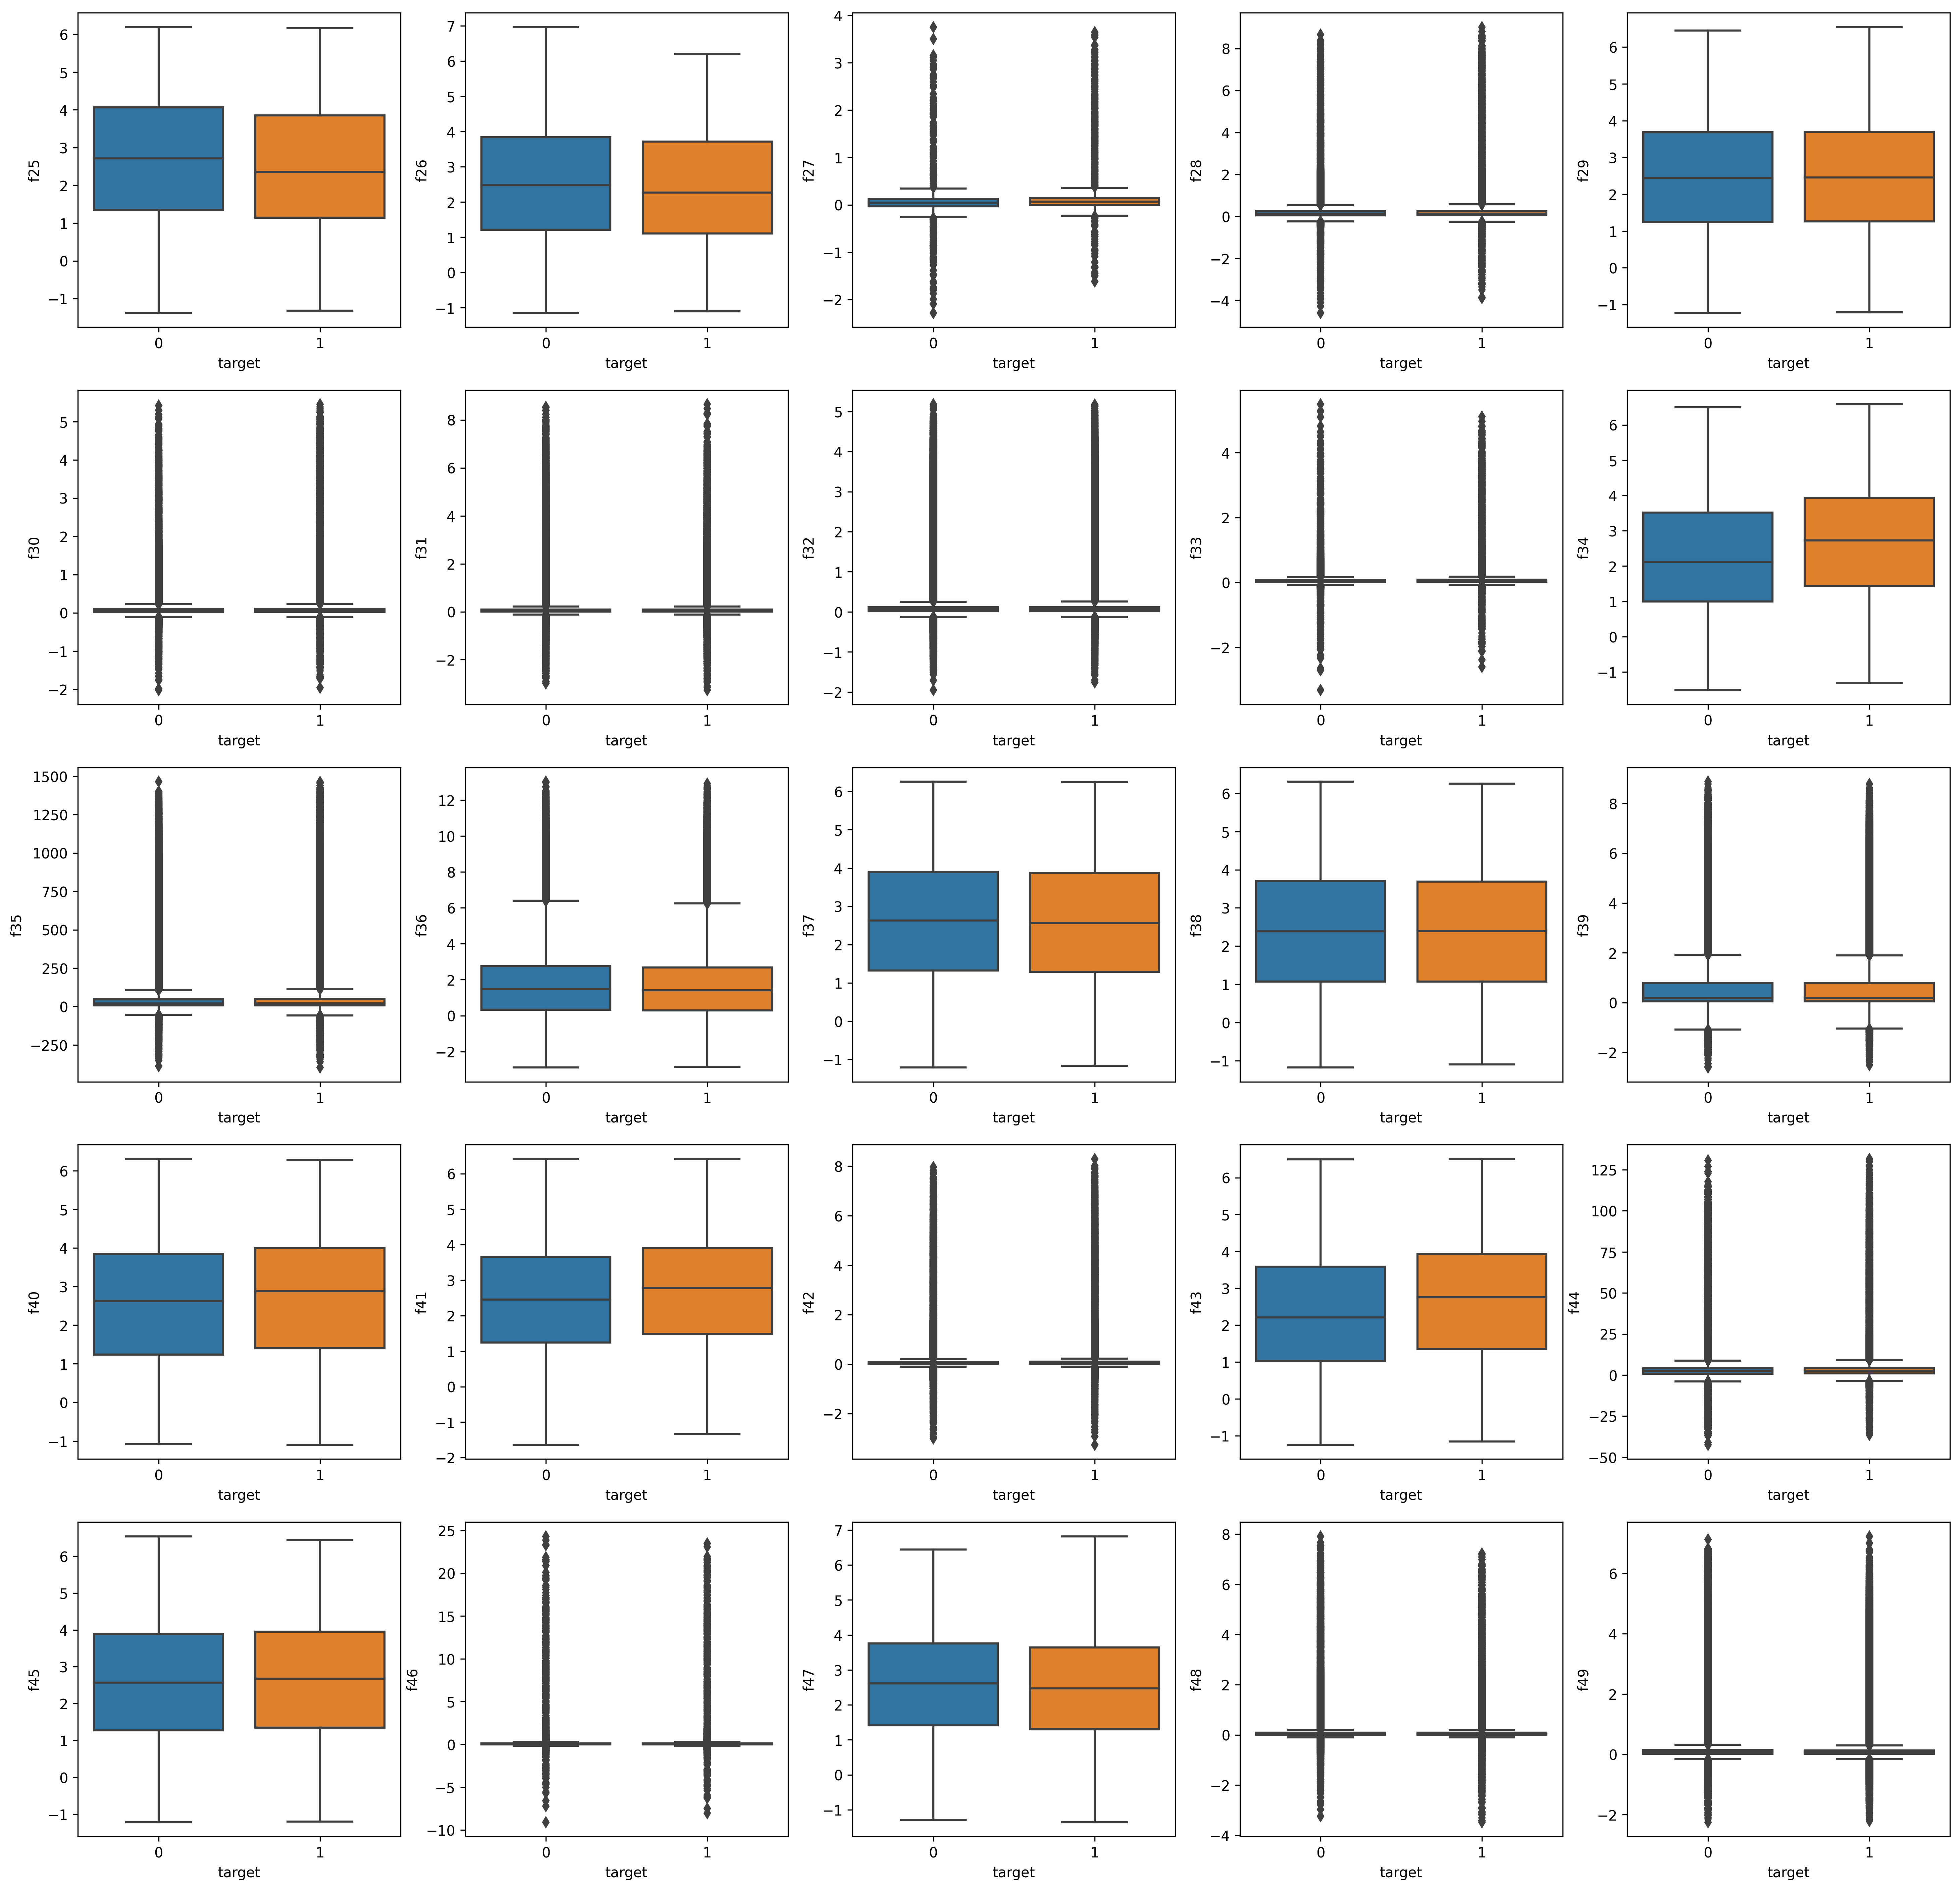

In [26]:
# f25 - f49
col_2 = tb_data.columns[25:50]
figure_2, axes_2 = plt.subplots(nrows=5, ncols=5, figsize=[24, 24], dpi=300)
axes_2 = axes_2.ravel()

for i in range(len(axes_2)):
    sns.boxplot(x=tb_data['target'], y=tb_data[col_2[i]],
                ax=axes_2[i], orient='v')

plt.show()

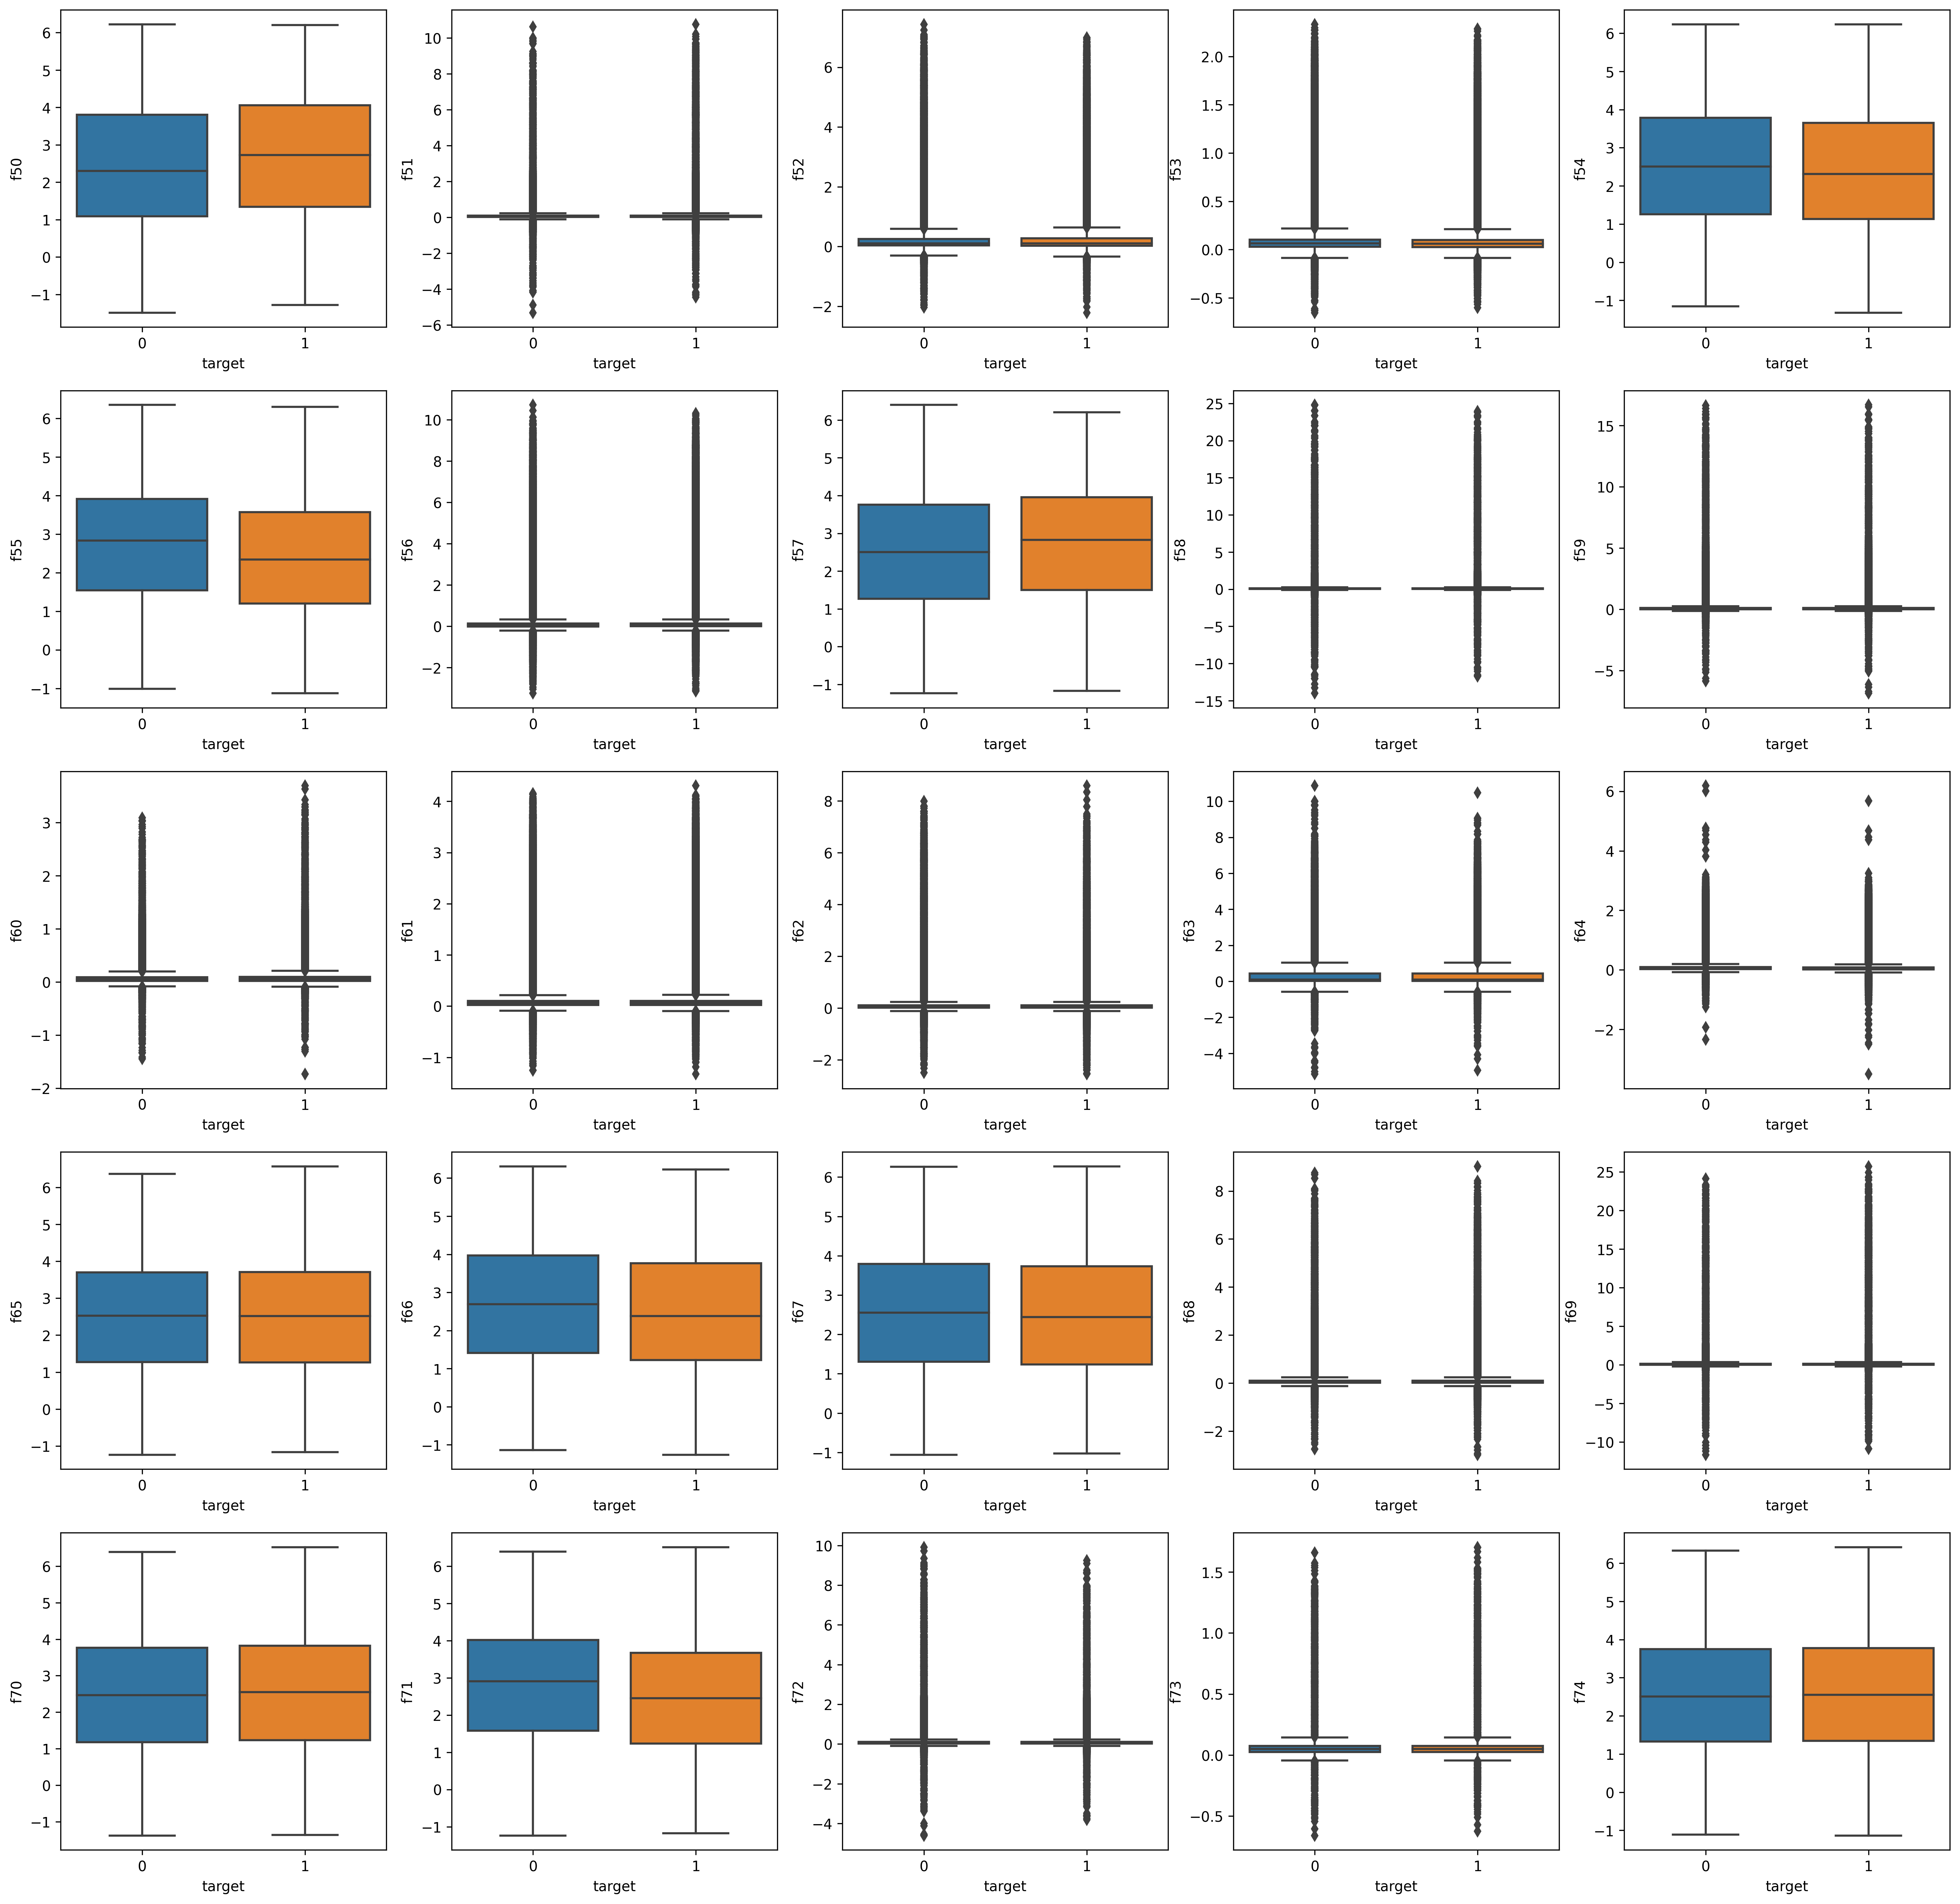

In [27]:
# f50 - f74
col_3 = tb_data.columns[50:75]
figure_3, axes_3 = plt.subplots(nrows=5, ncols=5, figsize=[24, 24], dpi=300)
axes_3 = axes_3.ravel()

for i in range(len(axes_3)):
    sns.boxplot(x=tb_data['target'], y=tb_data[col_3[i]],
                ax=axes_3[i], orient='v')

plt.show()

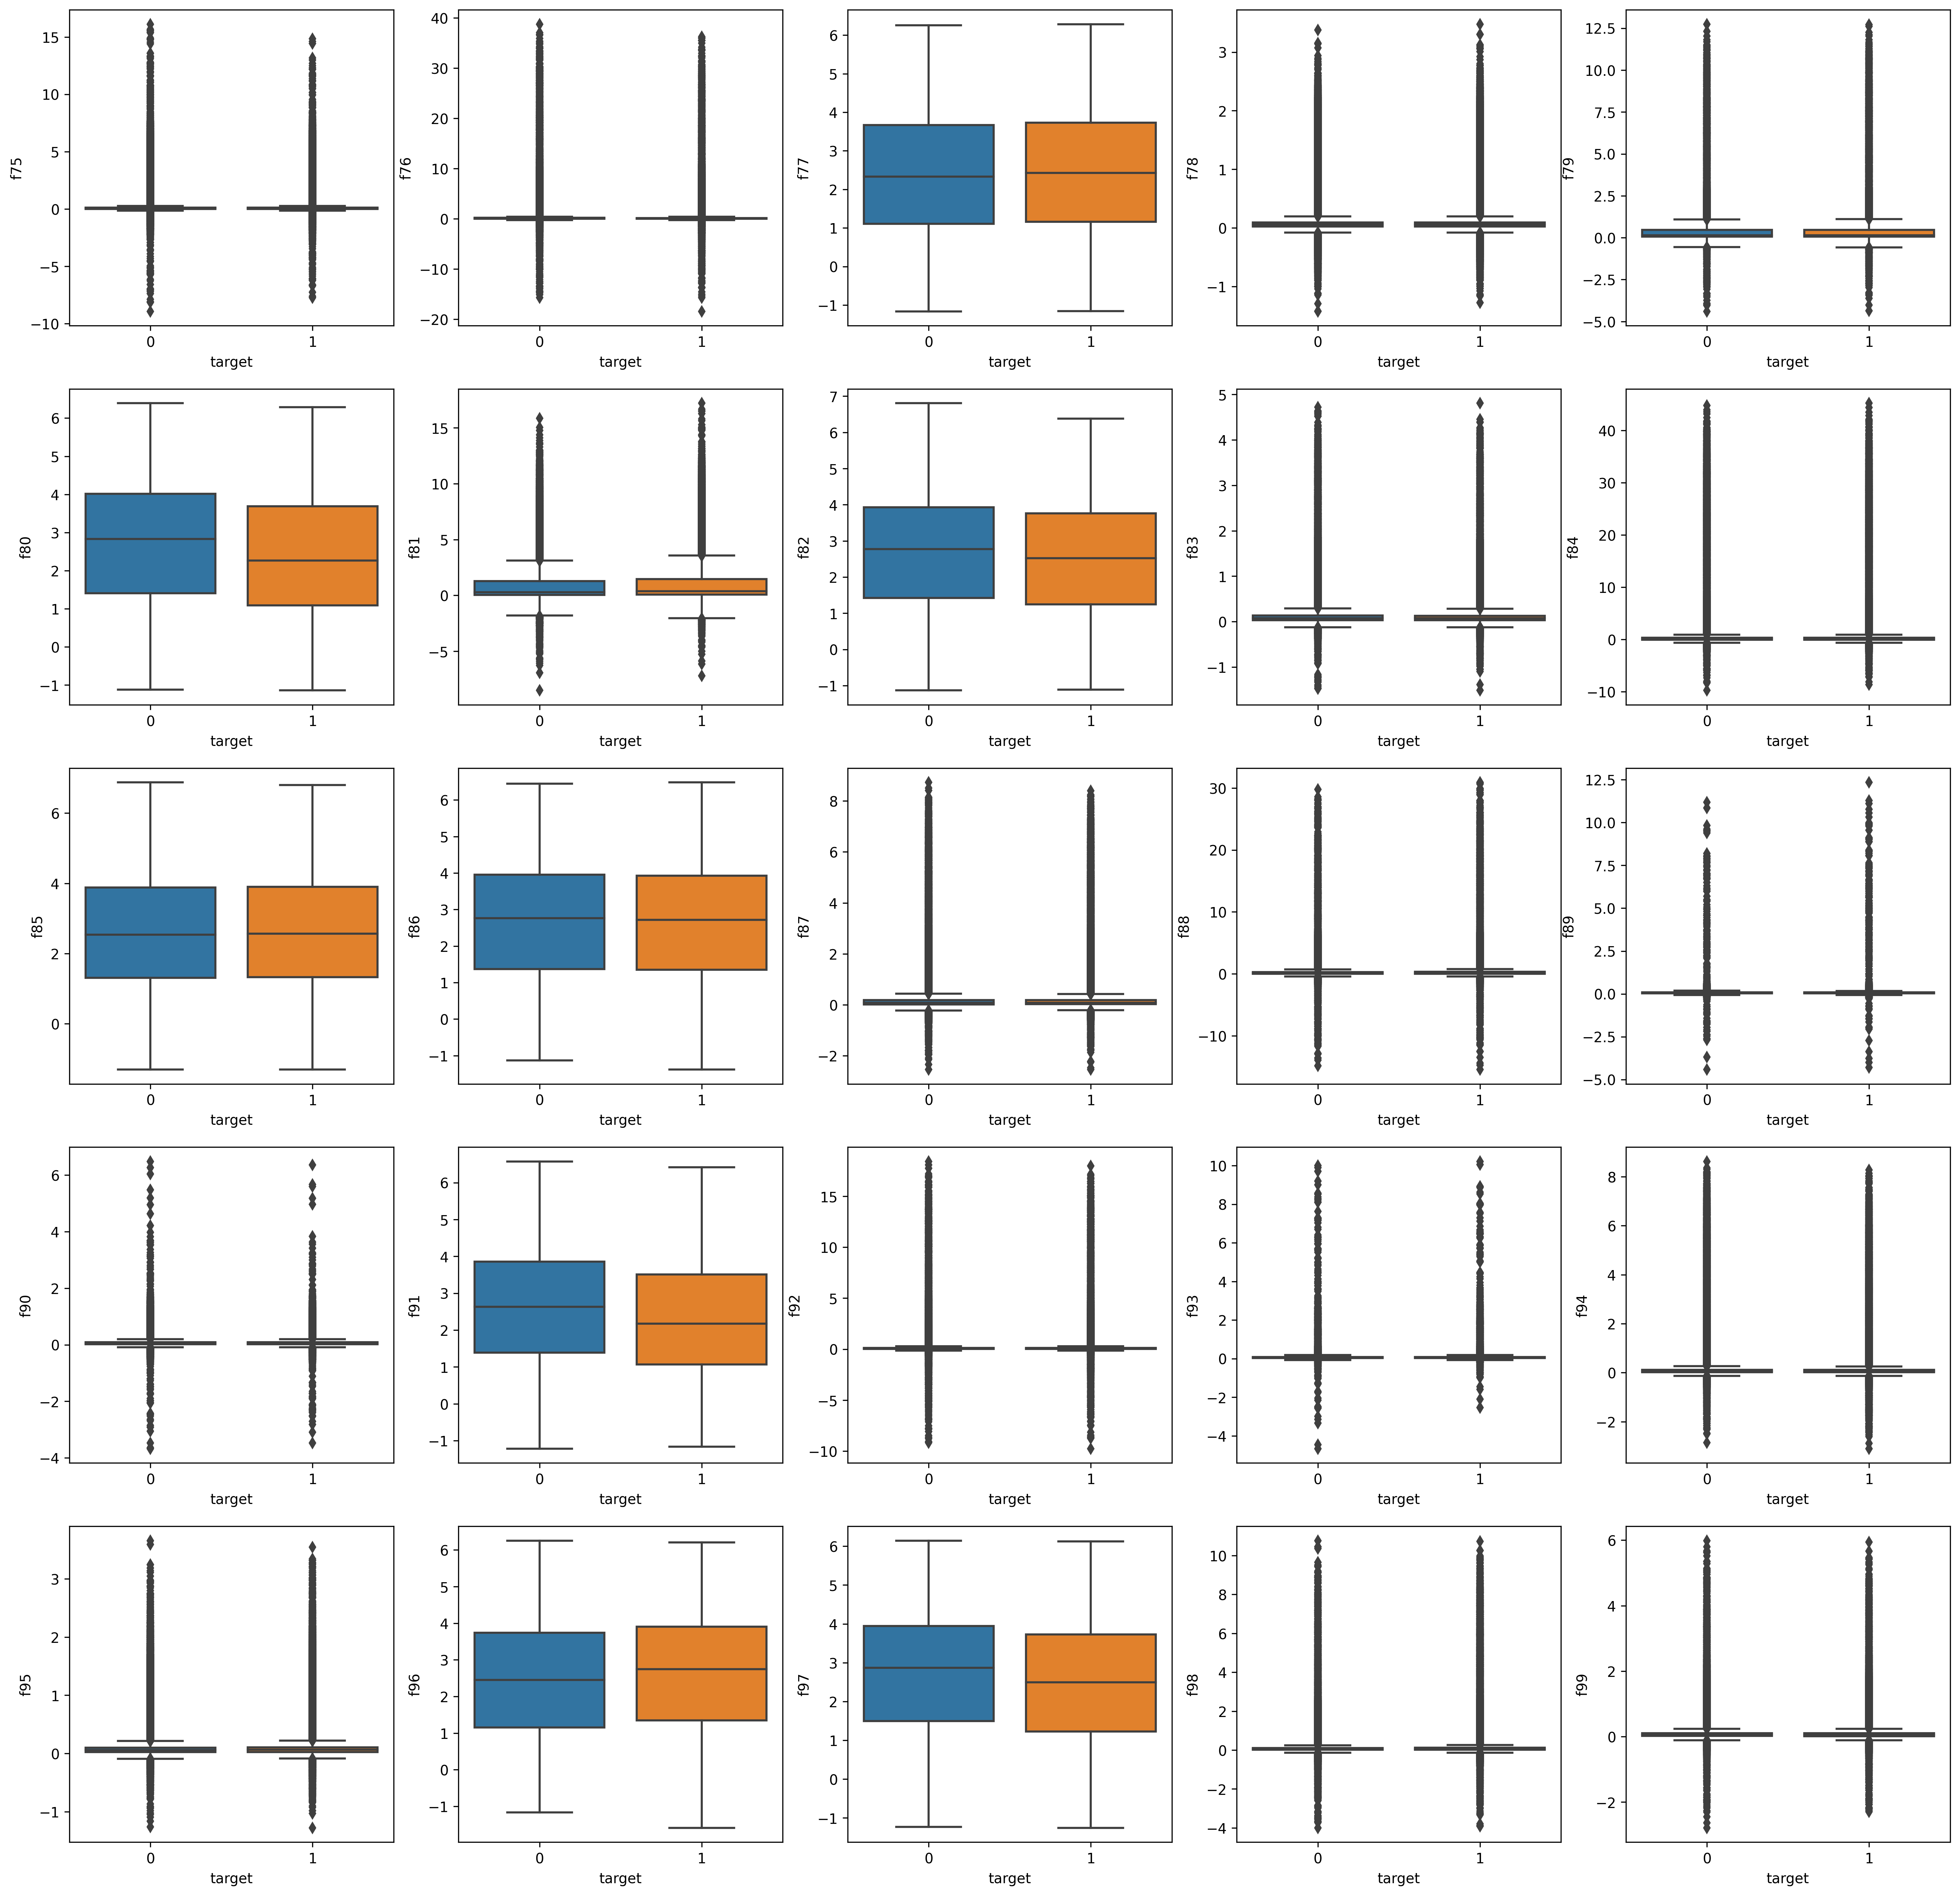

In [28]:
# f75 - f99
col_4 = tb_data.columns[75:]
figure_4, axes_4 = plt.subplots(nrows=5, ncols=5, figsize=[24, 24], dpi=300)
axes_4 = axes_4.ravel()

for i in range(len(axes_4)):
    sns.boxplot(x=tb_data['target'], y=tb_data[col_4[i]],
                ax=axes_4[i], orient='v')

plt.show()

In [31]:
# summery stats
pd.options.display.max_rows = 101
tb_data.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,600000.0,0.306508,0.522450,-3.797450,0.026222,0.097788,0.397184,8.781500
f1,600000.0,2.497590,1.554018,-1.223960,1.186237,2.516500,3.787630,6.226720
f2,600000.0,306.644536,551.743893,-1842.530000,43.573400,133.626000,302.262250,6119.280000
f3,600000.0,2.647901,1.544529,-1.368560,1.442028,2.634130,3.907640,6.521150
f4,600000.0,0.177850,0.417488,-3.206210,0.019709,0.061586,0.112712,8.265470
f5,600000.0,2.556832,1.562527,-1.169770,1.261038,2.590425,3.813662,6.515070
f6,600000.0,2.699650,1.564000,-1.059310,1.385820,2.801255,3.996913,6.586780
f7,600000.0,2.571593,1.549361,-1.281970,1.333848,2.557985,3.823450,6.258770
f8,600000.0,2.538273,1.532988,-1.242020,1.292163,2.475880,3.804360,6.389670
f9,600000.0,0.134370,0.421892,-2.577840,0.019563,0.058752,0.101046,7.078460
